# Personal Info
Name: Ben Koren  
ID: 302301551  
Kaggle Profile: https://www.kaggle.com/benkoren

## Kaggle configuration

In [1]:
!pip install -q kaggle
from google.colab import files

files.upload() # for uploading all needed file at once

{}

In [2]:
!mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp gender_submission.csv ~/.kaggle

In [4]:
!cp test.csv ~/.kaggle

In [5]:
!cp train.csv ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle

In [7]:
!ls ~/.kaggle

BenSubmission.csv  gender_submission.csv  kaggle.json  test.csv  train.csv


In [8]:
!chmod 600 ~/.kaggle/train.csv ~/.kaggle/gender_submission.csv ~/.kaggle/test.csv ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  429KB  2020-11-19 10:31:50           6426  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          2MB  2020-11-19 06:04:10           2780  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           2910  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            525  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

# The Titanic Boat  
![rms-sailing-from-southampton](https://user-images.githubusercontent.com/21170255/99629050-05e37b80-2a40-11eb-979d-3e8fd928e483.jpg)  
Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date.  
# Variables notes
survival - no = 0, yes = 1  
pclass -
1st = Upper 2nd = Middle 3rd = Lower  
 sex - male or female  
Age - if less then 1 is a fraction
sibsp -
The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch-
The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Imports and Definitions

In [10]:
import math, time, random, datetime
import numpy as np
import pandas as pd

# Visualization
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# ML 
# import catboost
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression 
# from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier, Pool, cv

# sklearn imports
import sklearn
# from sklearn import metrics
# from sklearn import pipeline
# from sklearn import linear_model
# from sklearn import preprocessing
from sklearn import model_selection

import warnings
warnings.filterwarnings('ignore') 

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [11]:
gender_df = pd.read_csv('~/.kaggle/gender_submission.csv')
train_df = pd.read_csv('~/.kaggle/train.csv')
test_df = pd.read_csv('~/.kaggle/test.csv')


# Data Analysis (EDA)
## This part is about seeing the data and we can understand from it.
### We will check for:  
- Numerical features ( Age, Fare, SibSp, Parch )
- Categorial features ( Survived, Sex, Embarked )


In [12]:
def describe_array_of_df(df_arr):
  for df in df_arr:
    print(df.describe(), '\n')

df_arr = [gender_df, train_df, test_df]
describe_array_of_df(df_arr)

       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000 

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...

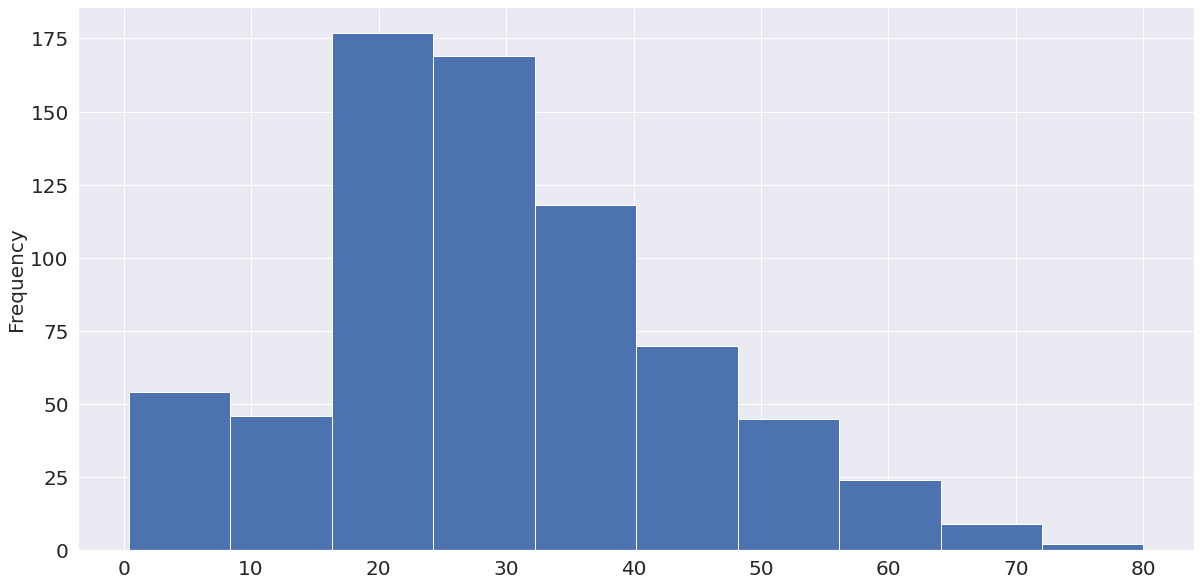

In [13]:
# train age histogram
train_df['Age'].plot.hist();

# Where is the missing value?  
## Visualising the missing data
We need to check if there are null values in our data, so we will know if it needs to be deleted/guessed.  
For example for the age we can use the median value for all of those who their age is missing

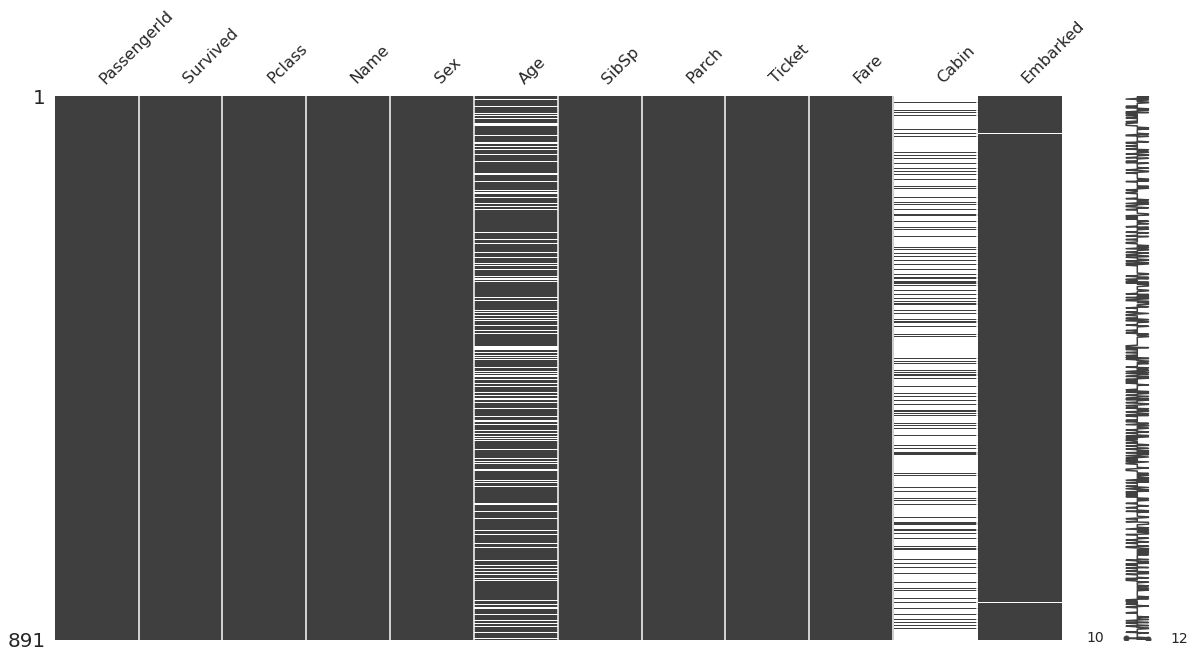

In [14]:
# Plot graphic of out missing values
missingno.matrix(df=train_df, figsize=(20,10));

In [15]:
# The types in our data
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# To see how the data looks like
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Survive percentage related to Pclass 
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Forture correspond to your chance to survive
- Pclass : As we can see almost 63% of people that were in Class 1 survived, where as only 24% of people who where in Class 3.  **Which high indicates that if you were reacher and in a better Class on the ship our survive chance were higher**.   
- Sex : we can see that 74% of the women survived compare to 18% for men, which higher indicates that female has a better chance to survive.
- SibSp : we can see that there is a strong connection between the amount of siblings and your chance to survive.
- Partch : this one is a bit confusing becuase it doesnt say much, because there are not so many families with 4/5/6 persons so it will be needed to measure carefully.


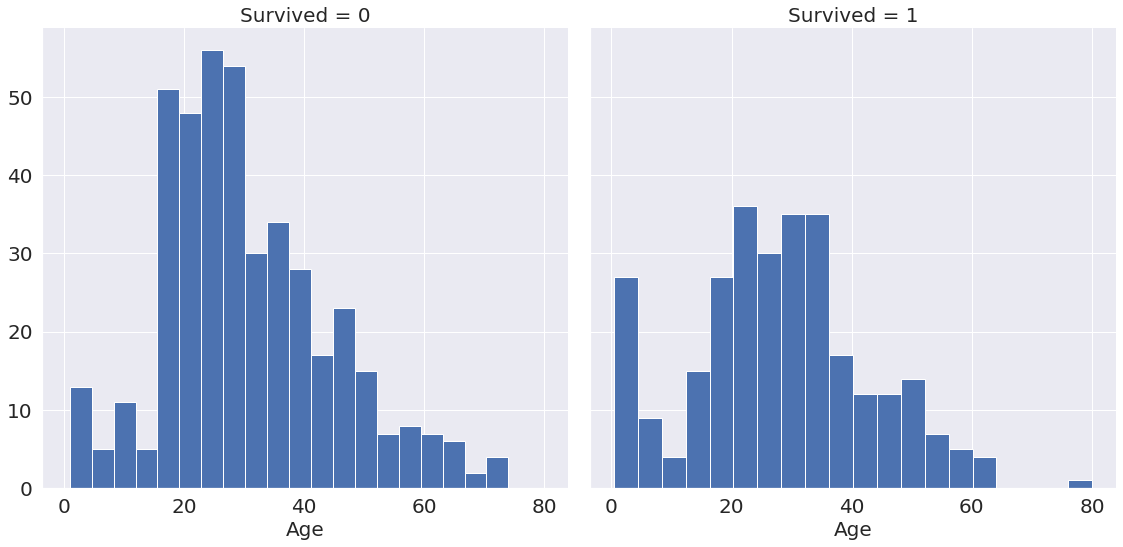

In [21]:
g = sns.FacetGrid(train_df, col='Survived', size=8);
g.map(plt.hist, 'Age', bins=20);

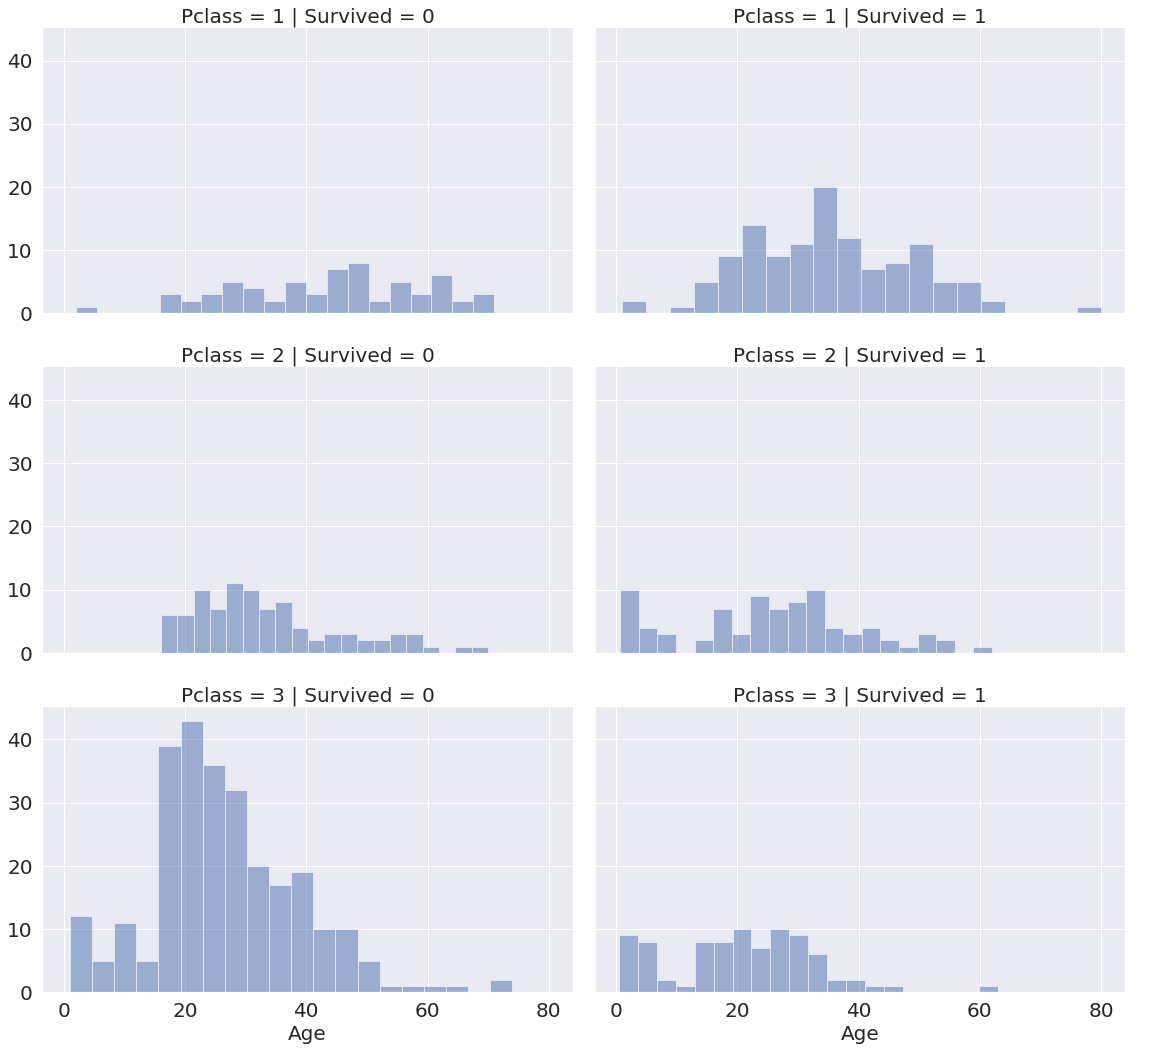

In [22]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=5, aspect=1.6 );
grid.map(plt.hist, 'Age', alpha=.5, bins=20);
grid.add_legend();

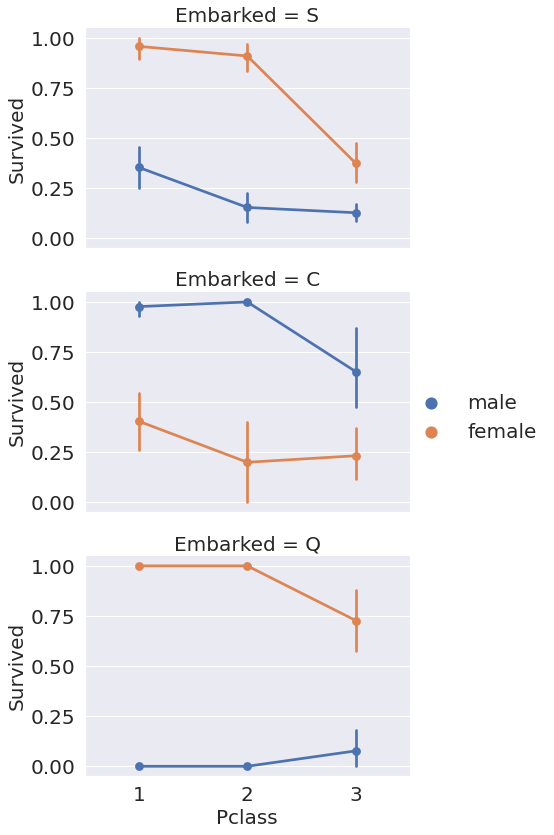

In [23]:
# How many females and males aboarded from each Embarked
grid = sns.FacetGrid(train_df, row='Embarked', size=4, aspect=1.6);
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep');
grid.add_legend();

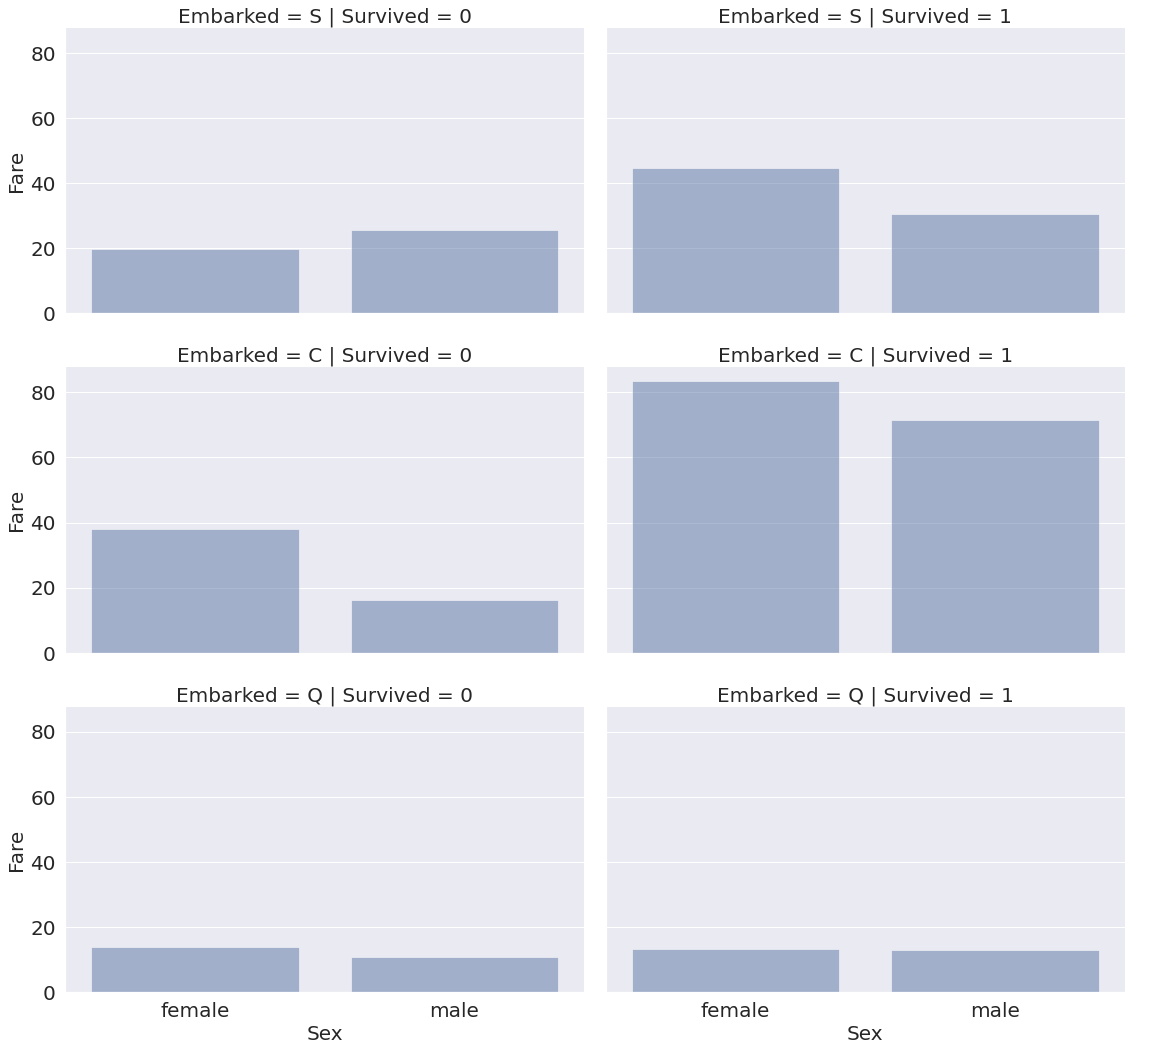

In [24]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=5, aspect=1.6);
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None);
grid.add_legend();

# Dropping unessery Values
more ytext to be added here

In [25]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

#Mapping Categorical Values 
more explanation here

In [26]:
# Making Title column
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [28]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [29]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [30]:
# Mapping sex into 0/1 values
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


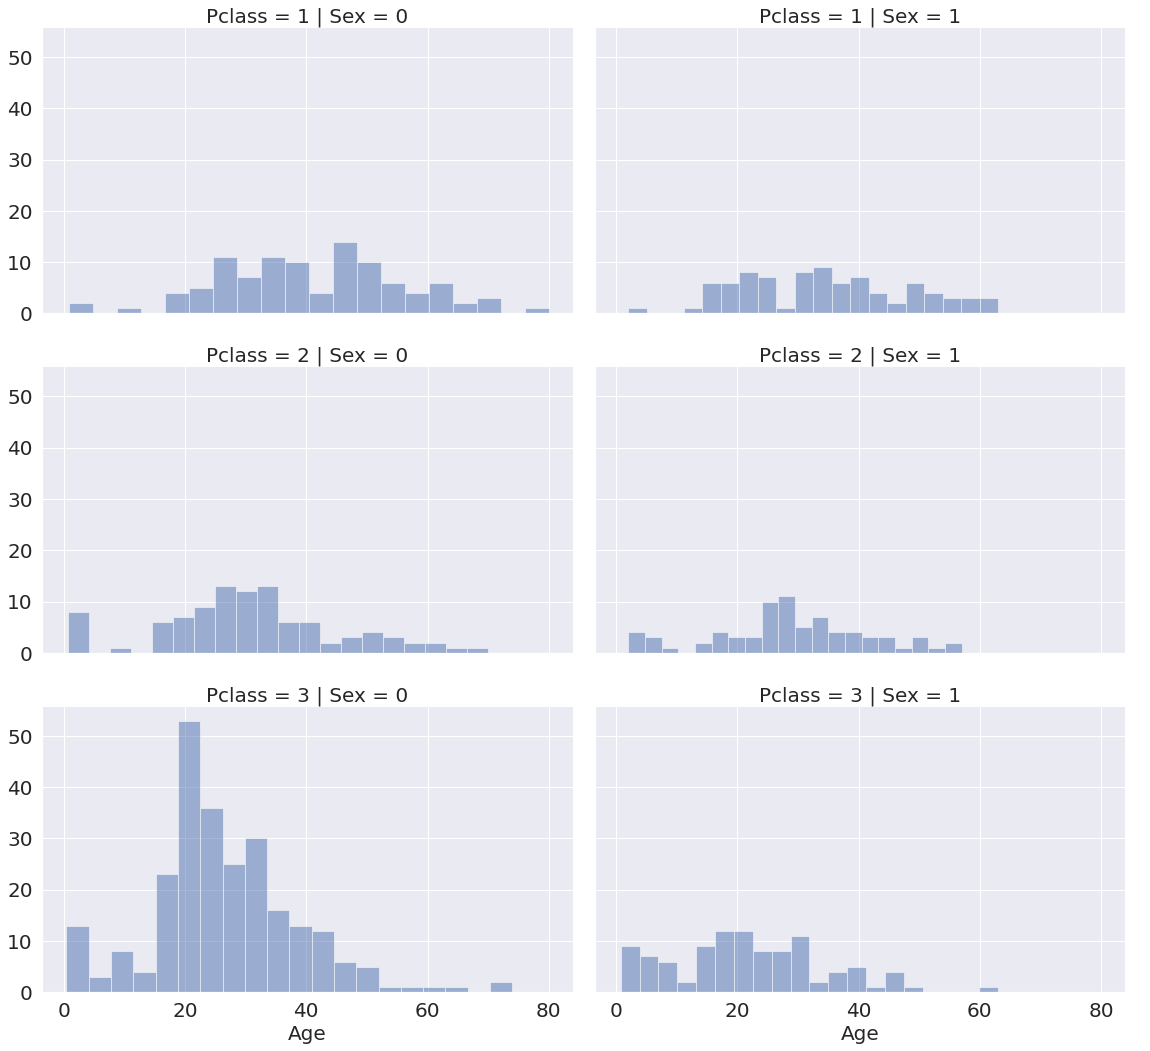

In [31]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=5, aspect=1.6);
grid.map(plt.hist, 'Age', alpha=.5, bins=20);
grid.add_legend();

# Fill Ages null values
write more about how it is being done

In [32]:
guess_ages = np.zeros((2,3))

for df in combine:
  for i in range(0,2):
    for j in range(0,3):
      guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()
      median_age = guess_df.median()
      guess_ages[i,j] = int(median_age * 2 + 0.5) /2
  
  for i in range(0, 2):
    for j in range(0, 3):
        df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]

  df['Age'] = df['Age'].astype(int)
  print(type(df.Age[0]))
train_df.head()
# combine[0].describe(())
# print(type(combine[0].Age[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [33]:
# dividing Age values into 8 groups
train_df['AgeBand'] = pd.cut(train_df.Age , 8)
age_band_df = train_df[["AgeBand", 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
age_band_df

,AgeBand,Survived
0,"(-0.08, 10.0]",0.593750
1,"(10.0, 20.0]",0.379310
2,"(20.0, 30.0]",0.322751
3,"(30.0, 40.0]",0.448649
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


In [34]:
for dataset in combine: 
  dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
  dataset.loc[(dataset['Age'] > 70) & (dataset['Age'] <= 80), 'Age'] = 7
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,2,1,0,7.2500,S,1,"(20.0, 30.0]"
1,1,1,1,3,1,0,71.2833,C,3,"(30.0, 40.0]"
2,1,3,1,2,0,0,7.9250,S,2,"(20.0, 30.0]"
3,1,1,1,3,1,0,53.1000,S,3,"(30.0, 40.0]"
4,0,3,0,3,0,0,8.0500,S,1,"(30.0, 40.0]"


In [35]:
# dropping AgeBand we created (becuase we changed the Age value)
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [36]:
# Creating family size column
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [37]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize'],
      dtype='object')

In [38]:
# Creating isAlone boolean value ( 1 alone , 0 not alone)
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [39]:
# dropping all family relations values 
# changed it to IsAlone comlumn
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,2,7.2500,S,1,0
1,1,1,1,3,71.2833,C,3,0
2,1,3,1,2,7.9250,S,2,1
3,1,1,1,3,53.1000,S,3,0
4,0,3,0,3,8.0500,S,1,1


### Creating an artificial feature combining Pclass and Age 
Which indicates that if you are young and in lower class your chance for surviving are high.

In [40]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,6,2,3
1,3,3,1
2,6,2,3
3,3,3,1
4,9,3,3
5,6,2,3
6,5,5,1
7,0,0,3
8,6,2,3
9,2,1,2


In [41]:
# finding the most common Embarked
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

### Surviving rate for each Embarked

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Filling Embarked column with numeric values
- S = 0
- C = 1
- Q = 2

In [43]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,2,7.2500,0,1,0,6
1,1,1,1,3,71.2833,1,3,0,3
2,1,3,1,2,7.9250,0,2,1,6
3,1,1,1,3,53.1000,0,3,0,3
4,0,3,0,3,8.0500,0,1,1,9


### Filling Fare null values with the median Fare column

In [44]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
len(np.where(test_df['Fare'].isnull())[0])

0

In [45]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [46]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,2,0,0,1,0,6
1,1,1,1,3,3,1,3,0,3
2,1,3,1,2,1,0,2,1,6
3,1,1,1,3,3,0,3,0,3
4,0,3,0,3,1,0,1,1,9
5,0,3,0,2,1,2,1,1,6
6,0,1,0,5,3,0,1,1,5
7,0,3,0,0,2,0,4,0,0
8,1,3,1,2,1,0,3,0,6
9,1,2,1,1,2,1,3,0,2


In [47]:
# Checking to see our test_df
test_df.head(10)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,3,0,2,1,1,9
1,893,3,1,4,0,0,3,0,12
2,894,2,0,6,1,2,1,1,12
3,895,3,0,2,1,0,1,1,6
4,896,3,1,2,1,0,3,0,6
5,897,3,0,1,1,0,1,1,3
6,898,3,1,2,0,2,2,1,6
7,899,2,0,2,2,0,1,0,4
8,900,3,1,1,0,1,3,1,3
9,901,3,0,2,2,0,1,0,6


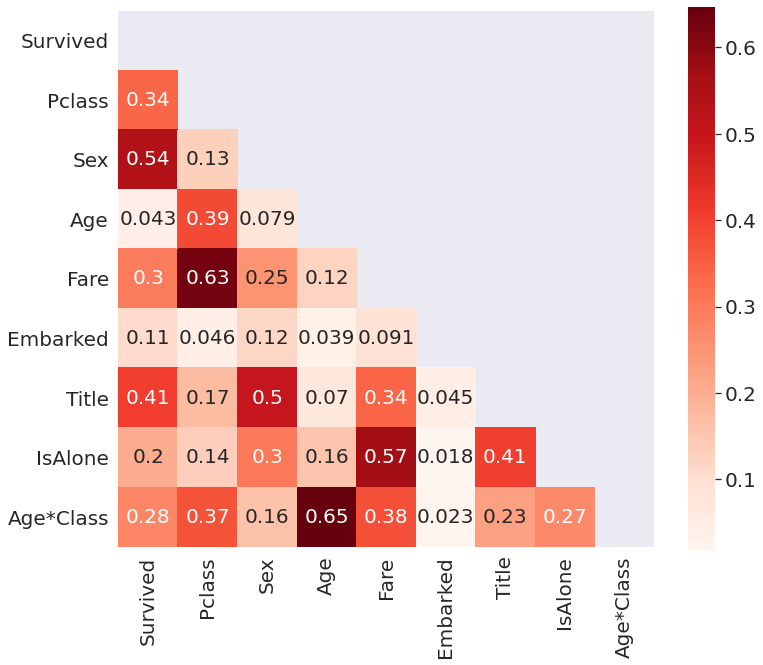

In [48]:
# Visualizing correlation
plt.figure(figsize=(12,10))
cor = np.abs(train_df.corr())
sns.heatmap(cor,mask=np.triu(np.ones_like(cor, dtype=bool)), annot=True, cmap=plt.cm.Reds, square=True)
plt.show()

In [49]:
# X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(train_df.drop('Survived', axis=1), train_df["Survived"], test_size=0.2, random_state=2)
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Logistic Regression

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.14

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [51]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.190530
5,Title,0.404243
4,Embarked,0.296429
6,IsAlone,0.203357
7,Age*Class,0.026041
3,Fare,-0.039168
2,Age,-0.364743
0,Pclass,-1.257461


In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('~/.kaggle/BenSubmission.csv', index=False)

![Screen Shot 2020-11-19 at 21 36 03](https://user-images.githubusercontent.com/21170255/99715234-3d3d4100-2aaf-11eb-9d2b-93c8df0005a9.jpg)

# Overall Overview
##### So the my steps were:
1) Kaggle configuration & uploading files  
2) Reading CSV files  
3) Exploring the Data  
4) Checking for NaN values  
5) Filling the NaN values  
6) Eliminating unessery features  
7) Creating new artificial features  
8) Making Logistic Regression Test  
9) Printing Correlation coefficient of all features   
10) Photo of my Score at Kaggle

**I really enjoyed doing this assignment.
 Finally things are getting real.**


I got a lot of help and direction from 
https://www.kaggle.com/startupsci/titanic-data-science-solutions  
(a notebook in kaggle)  